In [1]:
import pandas as pd
from yelp_functions import filter_by_category

# select the data for businesses which are coffee shops
coffee_shops = pd.read_csv('csv_data/yelp_academic_dataset_business.csv')
coffee_shops = filter_by_category(coffee_shops, 'Coffee & Tea')

# check the size of your new dataset
coffee_shops.shape

(6704, 14)

In [2]:
# select coffee shops in cities with at least 3 starbucks'
starbucks_coffees = coffee_shops[coffee_shops['name'] == "Starbucks"]
cities_with_starbucks = starbucks_coffees.groupby('city').count().reset_index()
cities_with_starbucks = cities_with_starbucks[cities_with_starbucks['name'] >= 3]
cities_with_starbucks = cities_with_starbucks['city'].tolist()
coffee_shops = coffee_shops[coffee_shops['city'].isin(cities_with_starbucks)]

# check distribution of coffee shops per city
coffee_shops.groupby('city').count()

,business_id,name,address,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
city,,,,,,,,,,,,,
Boise,138,138,138,138,138,138,138,138,138,138,138,138,127
Brandon,29,29,29,29,29,29,29,29,29,29,29,29,27
Brentwood,26,26,26,26,26,26,26,26,26,26,26,26,23
Broomall,9,9,9,9,9,9,9,9,9,9,9,9,9
Carmel,45,45,45,45,45,45,45,45,45,45,45,45,44
Cherry Hill,35,35,35,35,35,35,35,35,35,35,35,35,34
Clearwater,80,80,80,80,80,80,80,80,80,80,80,80,73
Doylestown,24,24,24,24,24,24,24,24,24,24,24,24,23
Edmonton,350,350,349,350,350,350,350,350,350,350,346,350,272


In [3]:
# get mean starbucks' rating per city
mean_starbucks_rating = starbucks_coffees.groupby('city').mean().reset_index()
mean_starbucks_rating = mean_starbucks_rating[['city', 'stars']]
mean_starbucks_rating.columns = ['city', 'mean_starbucks_rating']

# create a new dataframe with the number of coffee shops per city
coffee_shops_count = coffee_shops.groupby('city').count().reset_index()[['city', 'name']]
coffee_shops_count.columns = ['city', 'coffee_shops_count']

# merge the dataframes
mean_starbucks_rating = mean_starbucks_rating.merge(coffee_shops_count, on='city')

# check the new dataframe
mean_starbucks_rating

,city,mean_starbucks_rating,coffee_shops_count
0,Boise,3.321429,138
1,Brandon,3.100000,29
2,Brentwood,3.000000,26
3,Broomall,3.000000,9
4,Carmel,3.437500,45
5,Cherry Hill,3.214286,35
6,Clearwater,3.111111,80
7,Doylestown,2.666667,24
8,Edmonton,3.292683,350
9,Fishers,3.125000,27


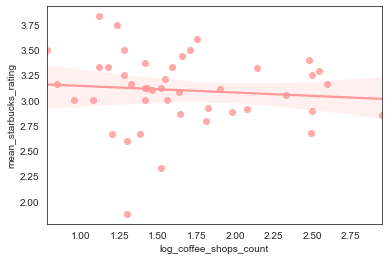

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# create log for the count column
mean_starbucks_rating['log_coffee_shops_count'] = np.log10(mean_starbucks_rating['coffee_shops_count'])

# plot data to visualize the relationship between the variables
sns.set_style('white')
sns.regplot(data=mean_starbucks_rating, x='log_coffee_shops_count', y='mean_starbucks_rating', color=(1.0, 0.6, 0.6))
plt.savefig('figures/starbucks_competition.png', dpi=200)
plt.show()

In [5]:
mean_starbucks_rating.corr()

,mean_starbucks_rating,coffee_shops_count,log_coffee_shops_count
mean_starbucks_rating,1.000000,-0.080789,-0.095404
coffee_shops_count,-0.080789,1.000000,0.840022
log_coffee_shops_count,-0.095404,0.840022,1.000000


In [6]:
mean_starbucks_rating

,city,mean_starbucks_rating,coffee_shops_count,log_coffee_shops_count
0,Boise,3.321429,138,2.139879
1,Brandon,3.100000,29,1.462398
2,Brentwood,3.000000,26,1.414973
3,Broomall,3.000000,9,0.954243
4,Carmel,3.437500,45,1.653213
5,Cherry Hill,3.214286,35,1.544068
6,Clearwater,3.111111,80,1.903090
7,Doylestown,2.666667,24,1.380211
8,Edmonton,3.292683,350,2.544068
9,Fishers,3.125000,27,1.431364


In [7]:
# create lists with cities with most and least competition
cities_with_high_competition = mean_starbucks_rating.sort_values(by='coffee_shops_count', ascending=False)['city'].tolist()[:10]
cities_with_low_competition = mean_starbucks_rating.sort_values(by='coffee_shops_count')['city'].tolist()[:10]

# check lists to see if it makes sense
cities_with_high_competition, cities_with_low_competition

(['Philadelphia',
  'Tampa',
  'Edmonton',
  'New Orleans',
  'Tucson',
  'Nashville',
  'Indianapolis',
  'Reno',
  'Boise',
  'Santa Barbara'],
 ['Sahuarita',
  'Mt. Juliet',
  'Broomall',
  'Oro Valley',
  'Wayne',
  'Spring Hill',
  'Newtown',
  'Smyrna',
  'Hendersonville',
  'Sherwood Park'])

In [8]:
# filter database to only stores in the cities with highest and lowest competition
starbucks_coffees = starbucks_coffees[starbucks_coffees['city'].isin(cities_with_high_competition + cities_with_low_competition)]

# label the stores as having high or low competition
starbucks_coffees['competition'] = 'high'
starbucks_coffees.loc[starbucks_coffees['city'].isin(cities_with_low_competition), ['competition']] = 'low'

# create list for business_id's with high and low competition
ids_with_low_competition = starbucks_coffees[starbucks_coffees['competition'] == 'low']['business_id'].tolist()
ids_with_high_competition = starbucks_coffees[starbucks_coffees['competition'] == 'high']['business_id'].tolist()

# check new dataframe
starbucks_coffees

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,competition
590,6_Zf2QsRHCH1RhbzA9inyw,Starbucks,8602 Hillsborough Ave,Tampa,FL,33615,27.996370,-82.580954,3.0,56,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'...",high
613,Iipfa9Kaac9XH5Vo8GQwvg,Starbucks,5956 153 Avenue,Edmonton,AB,T5Y 2W1,53.616147,-113.432424,3.5,10,1,"{'BusinessParking': ""{'garage': False, 'street...","Coffee & Tea, Food","{'Monday': '5:30-22:0', 'Tuesday': '5:30-22:0'...",high
1296,pxuMxh5oC7W-PDN9wwvozg,Starbucks,219 N Center St,Reno,NV,89501,39.527772,-119.812518,3.0,44,0,"{'BikeParking': 'False', 'Caters': 'False', 'O...","Coffee & Tea, Food","{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'...",high
2888,sD2yBIzp0SNYRMD4QfH9Jw,Starbucks,1018 N 2nd St,Philadelphia,PA,19123,39.966510,-75.140377,2.5,13,1,"{'WiFi': ""u'free'"", 'BusinessParking': ""{u'val...","Food, Coffee & Tea","{'Monday': '6:0-17:0', 'Tuesday': '6:0-17:0', ...",high
3099,J7TZeIXaJFgrSIZzAjQMsw,Starbucks,65 W River Rd,Tucson,AZ,85704,32.296291,-110.973648,3.5,6,1,"{'OutdoorSeating': 'True', 'WiFi': ""u'free'""}","Coffee & Tea, Food","{'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ...",high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150123,pM1M2A14mNXz48KCcQtz2w,Starbucks,4140 Woodland Ave,Philadelphia,PA,19104,39.946809,-75.206722,3.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '7:0-23:0', '...",high
150127,K_kRU8j8th6yBeLbI94pJQ,Starbucks,555 E Grant Rd,Tucson,AZ,85705,32.251672,-110.962574,3.5,9,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Coffee & Tea, Food","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ...",high
150233,2f1ZnZg7730yChhV24ARJw,Starbucks,5943 S East St,Indianapolis,IN,46227,39.679628,-86.148621,3.5,44,1,"{'WiFi': ""'free'"", 'BusinessAcceptsCreditCards...","Coffee & Tea, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ...",high
150288,_oJ5QA131I_XnyaXAa8nsA,Starbucks,7800 Colonel H Weir Cook Memorial Dr,Indianapolis,IN,46241,39.715112,-86.297335,2.5,7,0,"{'BusinessParking': ""{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",high


In [9]:
# import reviews data
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# filter reviews to the starbucks' under analysis
reviews = reviews[reviews['business_id'].isin(ids_with_low_competition + ids_with_high_competition)]

# label the reviews as having high and low competition
reviews['competition'] = 'high'
reviews.loc[reviews['business_id'].isin(ids_with_low_competition), ['competition']] = 'low'

# check review count for each class
reviews.groupby('competition').count()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
competition,,,,,,,,,
high,10729,10729,10729,10729,10729,10729,10729,10729,10729
low,509,509,509,509,509,509,509,509,509


In [10]:
from yelp_functions import balance_classes

# sample 500 reviews for each class
reviews = balance_classes(reviews, 'competition', 500)

# check new review count for each class
reviews.groupby('competition').count()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
competition,,,,,,,,,
high,500,500,500,500,500,500,500,500,500
low,500,500,500,500,500,500,500,500,500


In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

# split the data into training and testing data
competition_class = np.array(reviews['competition'].tolist())
X_train, X_test, y_train, y_test = train_test_split(reviews[['text']], competition_class, test_size=0.25, random_state=0)

In [12]:
from yelp_functions import get_processed_inputs, sum_to_one
from sklearn.feature_extraction.text import CountVectorizer

# pre-process the inputs
bow_train = get_processed_inputs(X_train)

# create the BoW representation for the set
bow_vec = CountVectorizer(max_features=1024, ngram_range=(1,2))
bow_train = sum_to_one(bow_vec.fit_transform(bow_train).toarray())

# we now create vectors for testing and validation
bow_test = sum_to_one(bow_vec.transform(get_processed_inputs(X_test)).toarray())

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# using SVMs for classification
svm = SVC(C=0.5).fit(bow_train, y_train)
print("SVM test score:", svm.score(bow_test, y_test))
print("SVM train score:", svm.score(bow_train, y_train))

# using random forests for classification
rfc = RandomForestClassifier(max_depth=5, random_state=0).fit(bow_train, y_train)
print("RF test score:", rfc.score(bow_test, y_test))
print("RF train score:", rfc.score(bow_train, y_train))

# using logistic regression for classification
lrc = LogisticRegression(random_state=0, max_iter=150, C=0.5).fit(bow_train, y_train)
print("LR test score:", lrc.score(bow_test, y_test))
print("LR train score:", lrc.score(bow_train, y_train))

# using naive bayes for classification
nbc = MultinomialNB().fit(bow_train, y_train)
print("NB test score:", nbc.score(bow_test, y_test))
print("NB train score:", nbc.score(bow_train, y_train))

SVM test score: 0.596
SVM train score: 0.8386666666666667
RF test score: 0.592
RF train score: 0.8786666666666667
LR test score: 0.544
LR train score: 0.6613333333333333
NB test score: 0.576
NB train score: 0.756


In [22]:
# get the coefficients for linear regression
lr_coefficients = lrc.coef_.tolist()[0]

# get 10 indexes for most and least import items
max_indexes, min_indexes = [], []
for i in range(20):
    max_idx = np.argmax(lr_coefficients)
    min_idx = np.argmin(lr_coefficients)
    max_indexes.append(max_idx)
    min_indexes.append(min_idx)
    lr_coefficients[max_idx] = 0
    lr_coefficients[min_idx] = 0

In [23]:
# find words related to high competition
high_competition_words = []
for index in min_indexes:
    test = np.zeros(1024)
    test[index] = 1
    high_competition_words.append(bow_vec.inverse_transform(test)[0][0])

# find words with low expectation users
low_competition_words = []
for index in max_indexes:
    test = np.zeros(1024)
    test[index] = 1
    low_competition_words.append(bow_vec.inverse_transform(test)[0][0])

np.array(high_competition_words), np.array(low_competition_words)

(array(['work', 'line', 'staff', 'find', 'come', 'minutes', 'tables',
        'location', 'outdoor', 'people', 'said', 'pretty', 'service',
        'table', 'morning', 'worst', 'wrong', 'water', 'card', 'stars'],
       dtype='<U8'),
 array(['drive', 'drinks', 'employees', 'newtown', 'want', 'place',
        'great', 'target', 'store', 'best starbucks', 'need', 'best',
        'starbucks', 'bad', 'new', '10', 'perfect', 'drink', 'ice',
        'plenty'], dtype='<U14'))